<a href="https://colab.research.google.com/github/mori-mkm/UFSCar/blob/main/Series/modelos/Atividade1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade de séries

A análise deve conter:
 - uma análise descritiva da série
 - um modelo ajustado
 - uma justificativa para a escolha do modelo

## Importando os dados e bibliotecas

In [1]:
import plotly.express as px
import matplotlib.pyplot as plt 
%pylab inline
plt.style.use('seaborn-whitegrid')

import numpy as np                               
import pandas as pd                         
import warnings
warnings.filterwarnings("ignore")

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

print("Bibliotecas importadas")




Populating the interactive namespace from numpy and matplotlib
Bibliotecas importadas


In [2]:
#Diretório dos meus dados
URL = "https://raw.githubusercontent.com/mori-mkm/UFSCar/main/Series/modelos/serie.csv"
# Importação dos dados
df = pd.read_csv(URL, decimal=",")
#Transformando a coluna t em indice
#df.set_index(df.t, inplace=True)
#df.drop(columns = ["t"], inplace = True)
df.head()

,t,serie
0,1,-0.8314
1,2,-0.0292
2,3,1.0328
3,4,0.8527
4,5,-0.3832


Analisando o banco de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       200 non-null    int64  
 1   serie   200 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


>> Nosso banco de dados é composto por uma variável quantitativa continua com 200 observações ao todo.

Estatísticas pontuais da série

In [4]:
df.serie.describe()

count    200.000000
mean       0.009965
std        1.405815
min       -3.874200
25%       -0.831325
50%        0.089150
75%        0.958800
max        3.086400
Name: serie, dtype: float64

> Perceba que a média da série proxima de zero e que o desvio padrão é de 1.4. Demonstrando que a série não tem uma alta variabilidade em sua composição. 

# Analise descritiva dos dados

## Visualização dos dados

In [5]:
fig = px.line(df, x='t', y="serie")
fig.show()

>> Aqui percebemos que a nossa série aparentemente tem média constante e proxima de zero. Além de deter de uma variabilidade constante, pois os valores da série não ultrapassa valores no intervalo de [3,-4].

###ACF (Função de autocorrelação)
Para verificar se existe tendencia em nossa série, logo vamos realizar o ACF da série

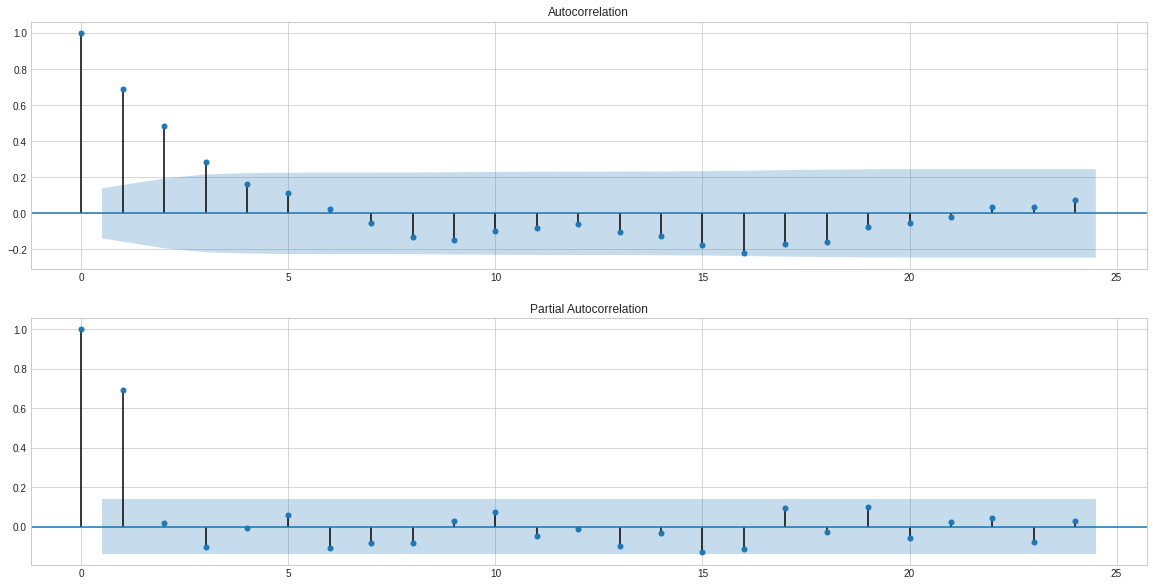

In [6]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plot_acf(df.serie, ax=plt.gca())
pyplot.subplot(212)
plot_pacf(df.serie, ax=plt.gca())
pyplot.show()

>> Perceba que com o passar dos lags no gráfico de autocorrelação os valores para a correlação entre a série vai diminuindo rápidamente, isto é um indicativo de que não existe tendencia.

>> E em relação ao gráfico de autocorrelação parcial, temos que um comportamento de um modelo autoregressivo.

### Teste de Dickey-Fuller

Mas para verificar se essas relações estão corretas, temos o teste de Dickey-Fuller que verifica se a série é estacionária ou não.

In [7]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determinando as estisticas moveis
    rolmean = pd.Series(timeseries).rolling(12).mean()
    rolstd = pd.Series(timeseries).rolling(12).std()

    #Plot estatisticas moveis:
    plt.figure(figsize=(20, 10))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Média móvel')
    std = plt.plot(rolstd, color='black', label = 'Dp móvel')
    plt.legend(loc='best')
    plt.title('Média e desvio padrão móvel')
    plt.show(block=False)
    
    #Execute o teste Dickey-Fuller:
    print('Resultado do teste de Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Valor da estatistica','p-valor','#Lags usados','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = round(value, 5)
    print(dfoutput)

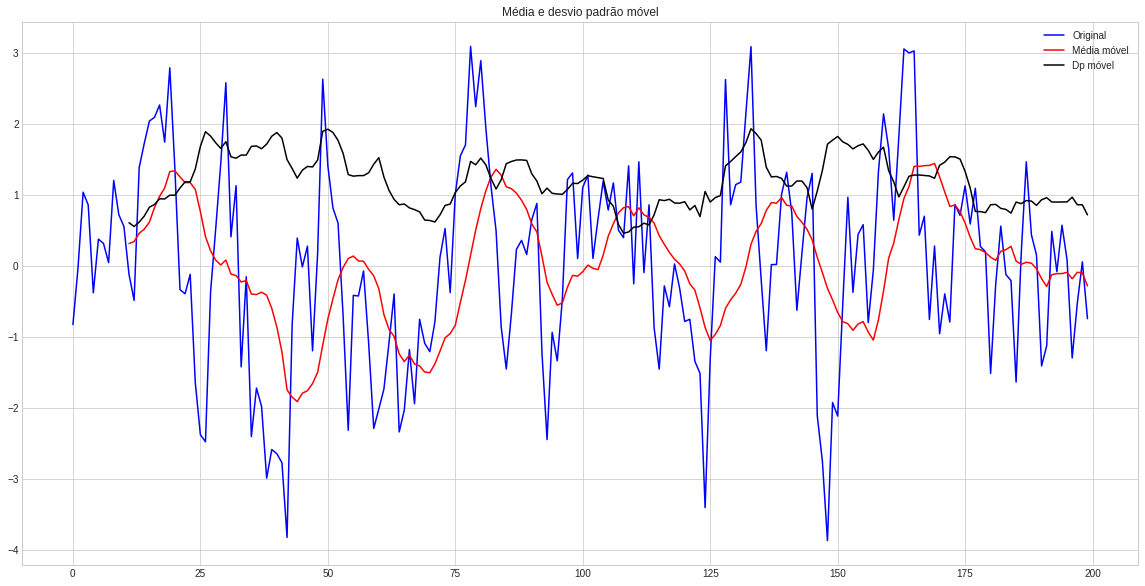

Resultado do teste de Dickey-Fuller:
Valor da estatistica          -6.009666e+00
p-valor                        1.584537e-07
#Lags usados                   0.000000e+00
Number of Observations Used    1.990000e+02
Critical Value (1%)           -3.463640e+00
Critical Value (5%)           -2.876180e+00
Critical Value (10%)          -2.574570e+00
dtype: float64


In [8]:
test_stationarity(df.serie)

>> Portanto podemos concluir que a série é estacionária por naturaza própria.

# Modelo Auto regressivo (AR)

In [9]:
from statsmodels.tsa.arima_model import ARIMA

* Perceba que não é nescessário utilizar a diferenciação, logo, d =0. 
* Agora, temos que p = 1 e q = 0

Text(0.5, 1.0, 'RSS: 206.1254')

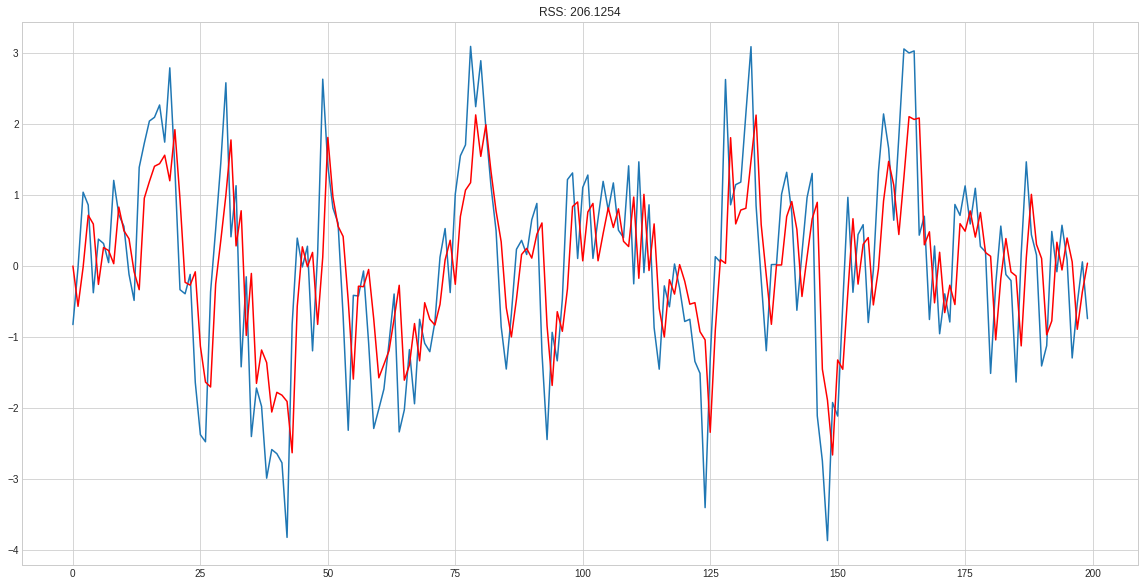

In [10]:
model = ARIMA(df.serie, order=(1, 0, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(20, 10))
plt.plot(df.serie)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df.serie)**2))

>>De acordo com o gráfico acima temos que o modelo tem um bom desempenho perante a realidade, visto que a reta em vermelho é a representação do modelo autoregressivo. 

E vamos avaliar mais a fundo o nosso modelo

In [11]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df.serie, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  serie   No. Observations:                  200
Model:                     ARMA(1, 0)   Log Likelihood                -286.969
Method:                       css-mle   S.D. of innovations              1.014
Date:                Tue, 28 Sep 2021   AIC                            579.938
Time:                        04:10:52   BIC                            589.833
Sample:                             0   HQIC                           583.943
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0073      0.228     -0.032      0.974      -0.453       0.439
ar.L1.serie     0.6882      0.051     13.524      0.000       0.588       0.788
                                    Roots       

# Analise de diagnostico

Varificando os residuos, temos que eles ficam muito proximos de uma méida igual a zero e tendem a ter uma variância uniforme, perceba que isto fica mais nítido no gráfico da densidade dos erros. 

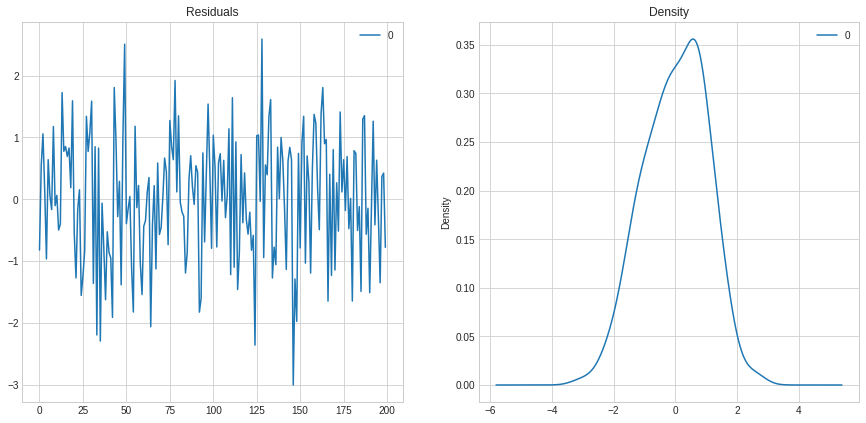

In [12]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(15, 7))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()